In [1]:
%matplotlib inline
import sys
from matplotlib import rc
rc('text', usetex=True)
from ExpData import ExpData
from ExpData import SimData
import ExpData as ed

In [2]:
e1f_binned = ExpData('/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_top1.root')

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_top1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


In [3]:
%run util_draw.py

def mdraw2d(hists, rows=2, cols=3, xlabel='', ylabel='',
            xlims=None, ylims=None, vmin=None, vmax=None,
            space=0, grid=False, figsize=None, **kwargs):
    nr, nc = rows, cols
    if figsize is None:
        figsize=goldenaspect(6.5,nr,nc)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=2*space, left=0.1, right=0.95, bottom=0.175)
    im = None
    gmin = min([h.GetMaximum() for h in hists]) if vmin is None else vmin
    gmax = max([h.GetMaximum() for h in hists]) if vmax is None else vmax
    mult = 1.0 if gmin<=0.9*gmax else 0.9
    vmax = mult*gmax if vmax is None else vmax
    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = nc*irow+(icol+1)
            h = hists[hnum-1]
            ax = plt.subplot(gs[irow, icol])
            im = rplt.imshow(asrootpy(h), axes=ax, vmin=vmin, vmax=vmax, **kwargs)
#             rplt.hist2d(h, axes=ax, **kwargs) #, norm=LogNorm())
            if xlims is not None:
                plt.xlim(xlims)
            if ylims is not None:
                plt.ylim(ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            if grid is True:
                plt.grid()
    fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    return fig

In [4]:
h2set = e1f_binned.get_h2s(1.91, [2,2.5])
h2set[3][1].Scale(h2set[0].Integral()/h2set[3][1].Integral())
hmmp = h2set[1][2]

INFO:ROOT.TCanvas.MakeDefCanvas]  created default TCanvas with name c1


adding key 1910x20_2250x500


In [5]:
result = W, Q2, hmmp, bgparms, f, parms, q, stat = ed.fit_mmp(hmmp, 1.91, [2,2.5])
result

(1.91,
 [2, 2.5],
 Hist('hbd_yield_proj_5'),
 (-282.8728393766998,
  1.0000001110223025,
  1080.3052002739148,
  0.9817279699999998,
  0.019999999999999796),
 <ROOT.TF1 object ("fsigbg") at 0xf7f3b80>,
 (-282.8728393766998,
  1.15000010094548,
  1091.0833970353722,
  0.9767275110681674,
  0.00740879758575525,
  629.3374810955961,
  0.780167217899025,
  0.017049949774773577),
 3.201113811711159,
 'NOT POSDEF')

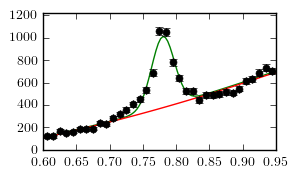

In [6]:
draw(result[2])
fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
X, Y = zip(*fitted_points)
Y_bg = [ed.bgfun([x], bgparms) for x in X]
plt.plot(X, Y)
plt.plot(X, Y_bg)
plt.show()

adding key 1730x20_2250x500
adding key 1770x20_2250x500
adding key 1810x20_2250x500
adding key 1850x20_2250x500


adding key 1890x20_2250x500
adding key 1930x20_2250x500


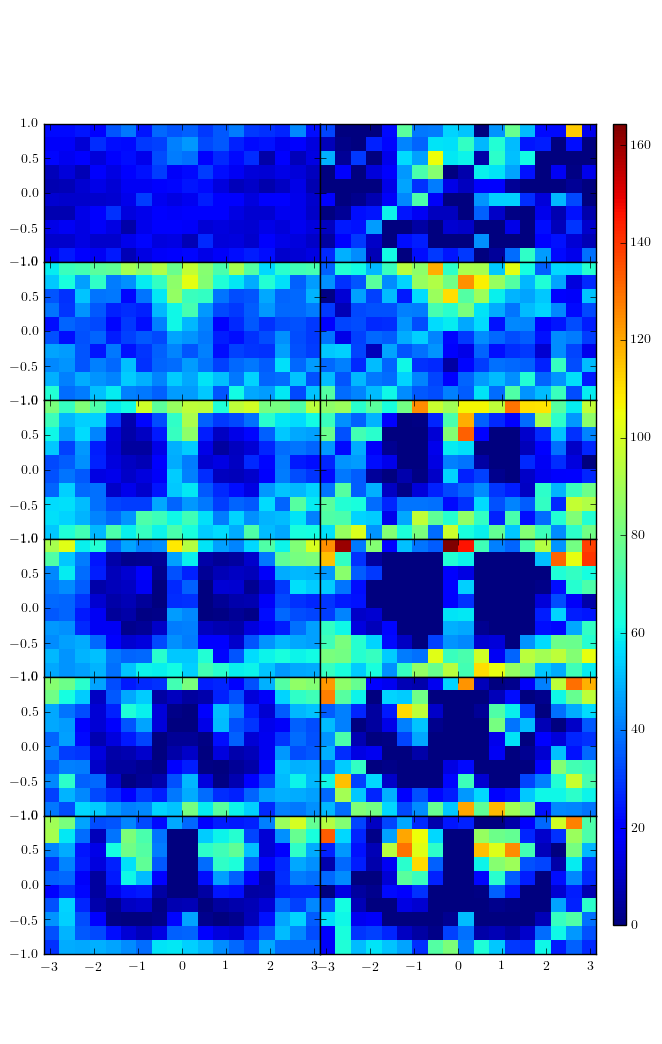

In [7]:
h2s = []
hmmpfit_results = []
for w in np.arange(1.73, 1.94, 0.04):
    h2set = e1f_binned.get_h2s(w, [2,2.5])
    h2s.extend([h2set[3][1]] + [h2set[0]])
    h2set[0].Scale(h2set[3][1].Integral()/h2set[0].Integral())
    hmmpfit_results.append(h2set[1])
    #print(h2set[0].Integral(), h2set[3][1].Integral())
mdraw2d(h2s,len(hmmpfit_results),2, vmin=0)
plt.show()

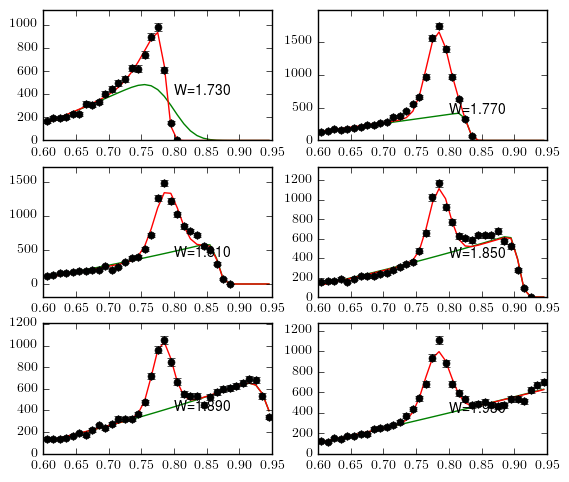

In [8]:
hmmps = []
bgs = []
sigbgs = []
for result in hmmpfit_results:
    W,Q2,hmmp,bgparms,f,parms,q,stat = result
    hmmps.append(asrootpy(hmmp))
    X = [hmmp.GetBinCenter(mmpbin) for mmpbin in range(1,hmmp.GetNbinsX()+1)]
    Y_bg = [ed.bgfun([x], bgparms) for x in X]
    bgs.append((X,Y_bg))
    Y = [ed.fitfun([x], parms) for x in X]
    sigbgs.append((X,Y))
fig = mdraw(hmmps, 2, 3)
for ax,results,bg,sigbg in zip(fig.get_axes(),hmmpfit_results,bgs,sigbgs):
    X, Y = sigbg
    _, Y_bg = bg
    ax.plot(X, Y_bg)
    ax.plot(X, Y)
    W, Q2 = results[0], sum(results[1])/2
    ax.text(0.8, 400, 'W=%.3f'%(W))
plt.show()

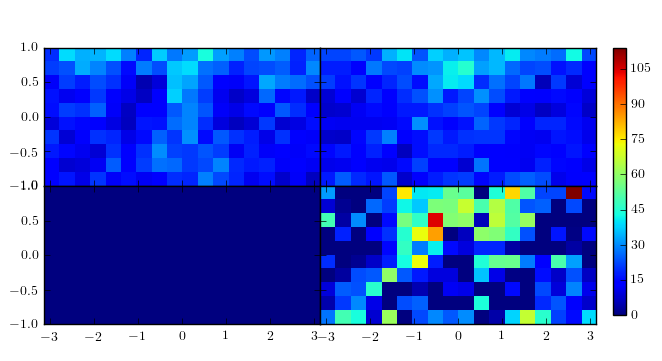

adding key 1830x20_2250x500


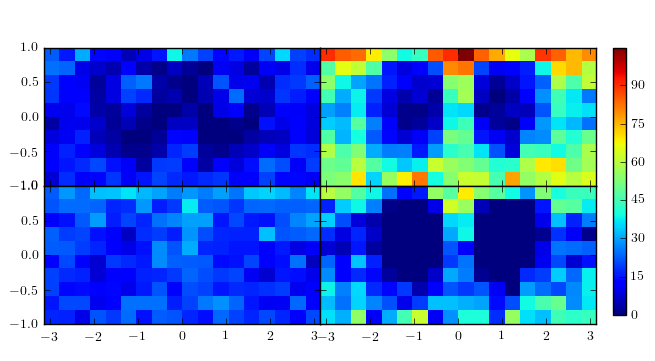

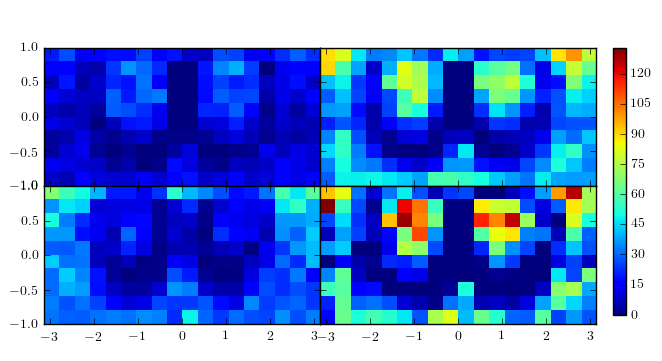

adding key 2030x20_2250x500


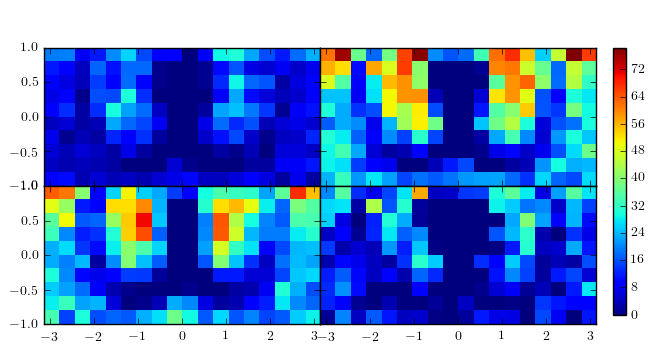

adding key 2130x20_2250x500


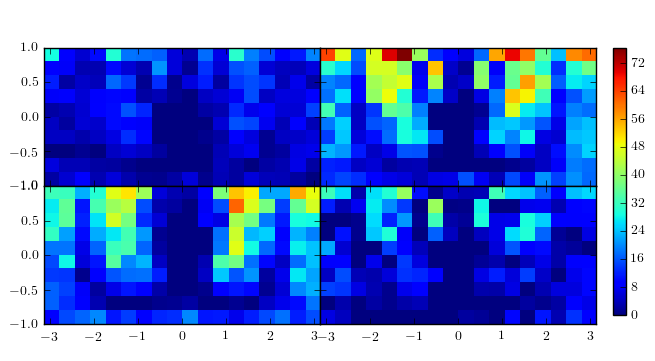

adding key 2230x20_2250x500


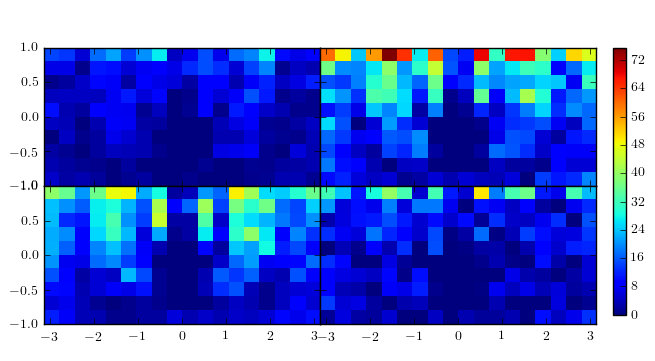

adding key 2330x20_2250x500


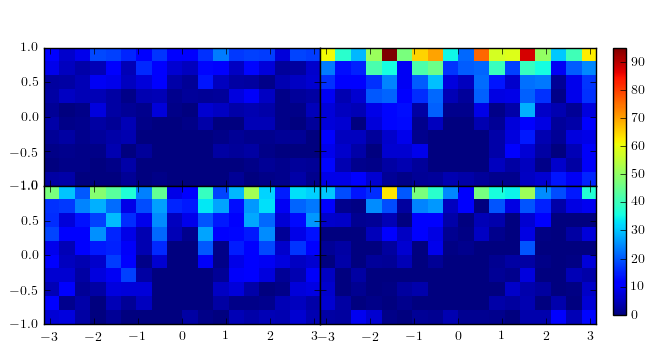

adding key 2430x20_2250x500


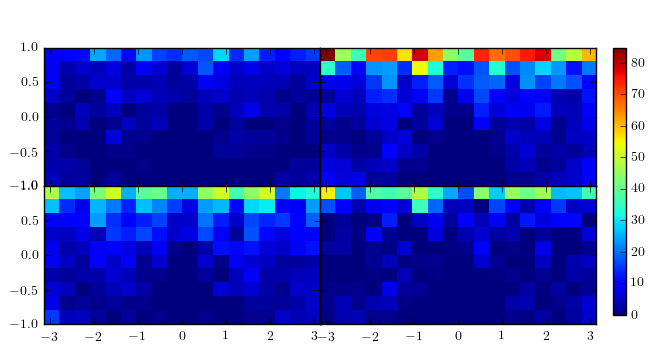

adding key 2530x20_2250x500


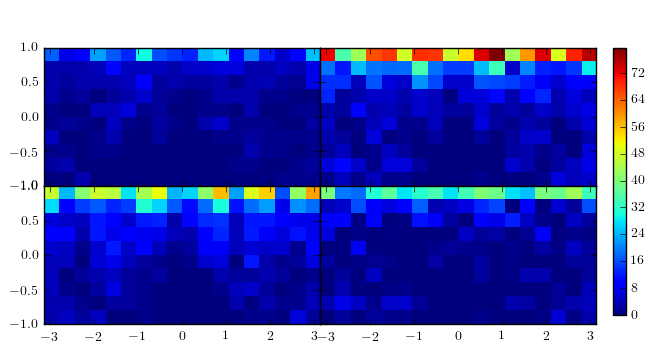

adding key 2630x20_2250x500


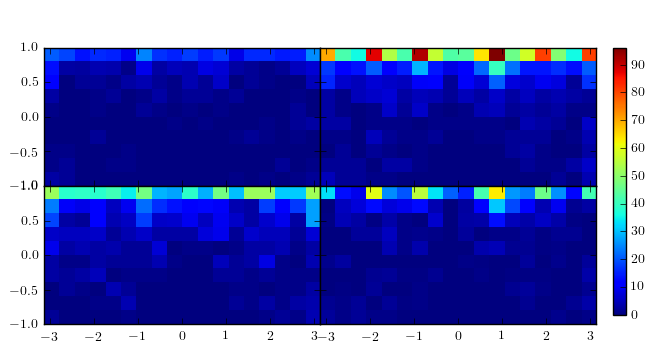

adding key 2730x20_2250x500


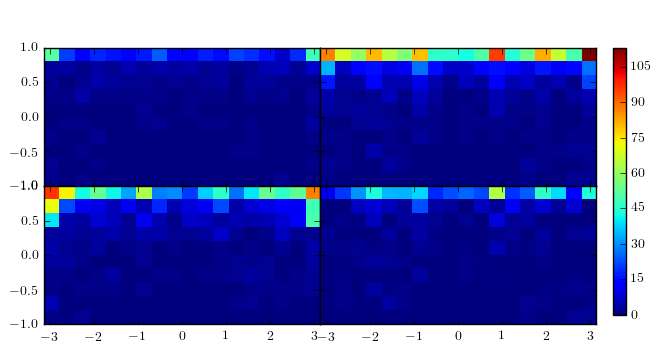

In [9]:
for w in np.arange(1.73, 2.74, 0.1):
    h2set = e1f_binned.get_h2s(w, [2, 2.5])
    h2s = h2set[3] + [h2set[0]]
    mdraw2d(h2s,2,2, vmin=0)
    plt.show()

In [10]:
W, Q2 = 1.91, [2,2.5]
h2set = e1f_binned.get_h2s(W, Q2)
h2set

[Hist2D('h2_2_1910x20_2250x500_bgsubd'),
 (1.91,
  [2.0, 2.5],
  Hist('hbd_yield_proj_5'),
  (-282.8728393766998,
   1.0000001110223025,
   1080.3052002739148,
   0.9817279699999998,
   0.019999999999999796),
  None,
  (-282.8728393766998,
   1.15000010094548,
   1091.0833970353722,
   0.9767275110681674,
   0.00740879758575525,
   629.3374810955961,
   0.780167217899025,
   0.017049949774773577),
  3.201113811711159,
  'NOT POSDEF'),
 [2285.828712582588, 3141.622371456815, 4107.163622140884],
 [Hist2D('h2_1_1910x20_2250x500'),
  Hist2D('h2_2_1910x20_2250x500'),
  Hist2D('h2_3_1910x20_2250x500')]]

h2_2_1910x20_2250x500_bgsubd
21.61574368699734 7.567444741407368
17.413856978684553 3.1524396440069897


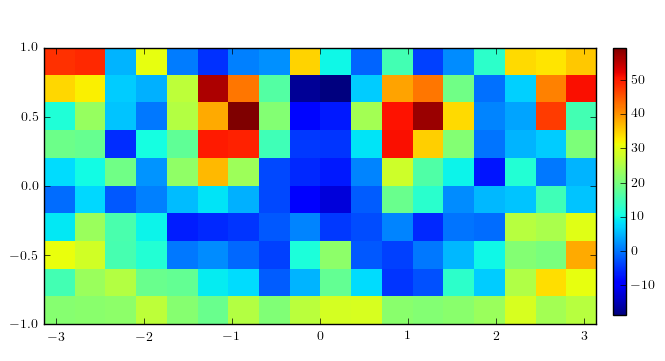

In [11]:
mdraw2d([h2set[0]],1,1)
print(h2set[0].GetName())
print(h2set[0].GetBinContent(1,1), h2set[0].GetBinError(1,1))
print(h2set[3][1].GetBinContent(1,1), h2set[3][1].GetBinError(1,1))

In [12]:
e1f_sim = SimData()
dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
#fns = ['e16_sim_skim_top1_ho.root', 'e16_sim_skim_top1_321_ho.root', 'e16_sim_skim_top1_326_ho.root']
#fns = ['e16_sim_skim_top1_321_ho.root', 'e16_sim_skim_top1_326_ho.root']
fns = ['e16_sim_skim_top1_lt320_ho.root']
for fn in fns:
        e1f_sim.add_sim('%s/%s'%(dirin,fn))

In [13]:
e1f_sim.fns

['/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_lt320_ho.root']

In [14]:
# W, Q2 = 2, [1.75,2.25]
# W, Q2 = 1.775, [1.35,1.85]
W, Q2 = 2, [2.0,2.5]
h2as = e1f_sim.get_acc2d(W, Q2)

211635 39098.2722228302
148098 7809.865679213421


h2a_1990x20_2250x600
0.0
0.44474814313950234


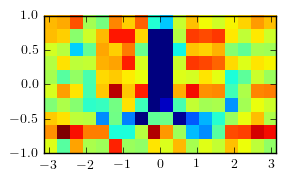

In [15]:
ih = 2
draw(h2as[0][ih])
print(h2as[0][ih].GetName())
print(h2as[0][ih].GetMinimum())
print(h2as[0][ih].GetMaximum())

[(Hist2D('h2t_1990x20_2250x600'),
  Hist2D('h2r_1990x20_2250x600'),
  Hist2D('h2a_1990x20_2250x600'),
  Hist2D('Hist2D_xyUpJJoq6VcrNoE2pqE5Yj'),
  Hist2D('h2a_1990x20_2250x600_masked')),
 (Hist2D('h2t1_1990x20_2250x600'),
  Hist2D('h2r1_1990x20_2250x600'),
  Hist2D('h2a1_1990x20_2250x600'),
  Hist2D('Hist2D_y4YoH47EjV6U4Wh5EGWdk5'),
  None)]

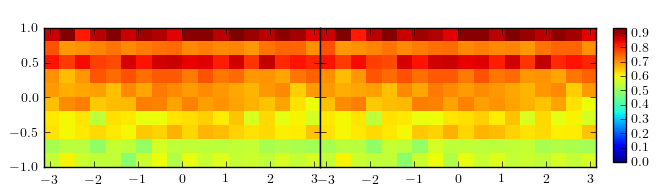

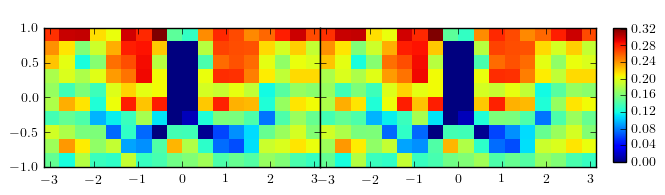

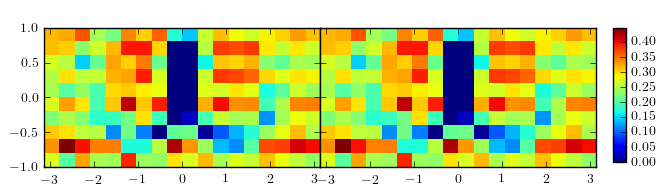

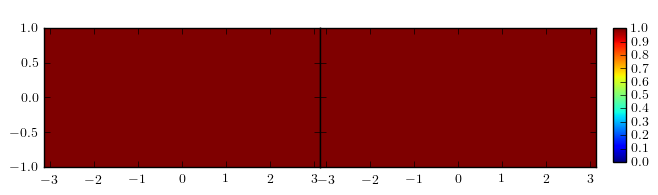

In [32]:
nruns = len(e1f_sim.fns)
for i in range(0,4):
    mdraw2d([h2a[i] for h2a in h2as], int(nruns/2+0.5),2, vmin=0)
h2as

h2a_1990x20_2250x600


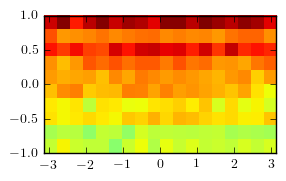

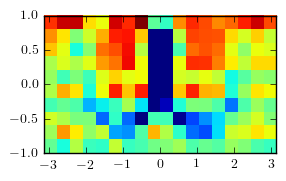

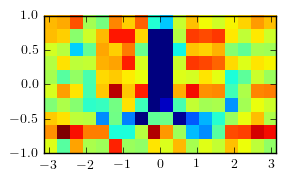

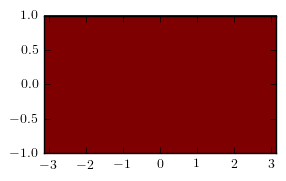

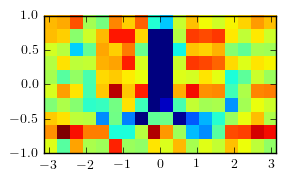

In [33]:
for h2a in h2as[0]:
    draw(h2a, vmin=0)
print(h2as[0][2].GetName())

(0, 0.5)

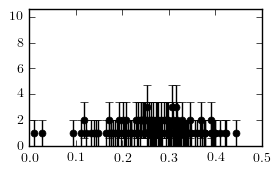

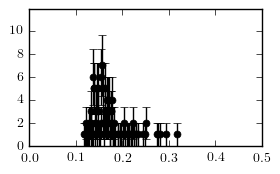

In [34]:
hacc,herr = ed.get_vhists(h2as[0][2])
hacc.SetBinContent(1,0)
herr.SetBinContent(1,0)
draw(hacc)
plt.ylim(0)
plt.xlim(0,0.5)
draw(herr)
plt.ylim(0)
plt.xlim(0,0.5)

In [20]:
result

(1.9300000000000002,
 [2.0, 2.5],
 Hist('hbd_yield_proj_5'),
 (-593.3289097444958,
  933.5031366081713,
  381.2442588988508,
  1.0017279700000004,
  0.02000000000000024),
 <ROOT.TF1 object ("fsigbg") at 0xe15c8f0>,
 (-593.3289097444958,
  951.9422873952619,
  356.9366542929474,
  0.9967087146409553,
  0.013827342419060298,
  625.656050765075,
  0.7830658562769698,
  0.0193841144133847),
 2.393560559230752,
 'CONVERGED ')

In [36]:
# W, Q2 = [1.95,2.05], [1.8,2.3]
W, Q2 = 1.8, [1.75,2.25]
# W, Q2 = 2.1, [1.7,2.1]
# W, Q2 = 1.77, [1.35,1.85]
h2_exp_set = e1f_binned.get_h2s(W, Q2)
h2_sim_set = e1f_sim.get_acc2d(W, Q2, 0.5)

adding key 1790x20_2000x500
363068 157419.05430312987
208287 6021.07315542818
363070 289965.1393200616
208601 11618.751952362405


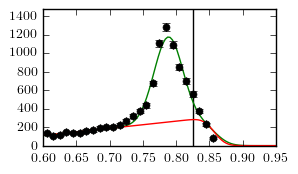

In [37]:
# W, Q2, hmmp, bgparms, f, parms, q, stat
result = h2_exp_set[1]
draw(result[2])
fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
X, Y = zip(*fitted_points)
Y_bg = [ed.bgfun([x], result[3]) for x in X]
plt.plot(X, Y)
plt.plot(X, Y_bg)
plt.vlines(0.825,0,3500)
plt.show()

h2_2_1790x20_2000x500_bgsubd
h2a_1780x40_2000x500_masked


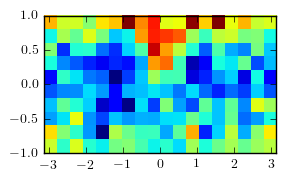

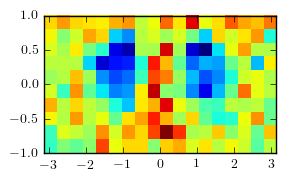

In [38]:
for h2 in [h2_exp_set[0], h2_sim_set[0][4]]:
    draw(h2)
    print(h2.GetName())

.


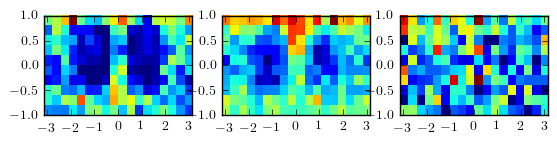

In [39]:
mdraw(h2_exp_set[3], 3,1)
print('.')

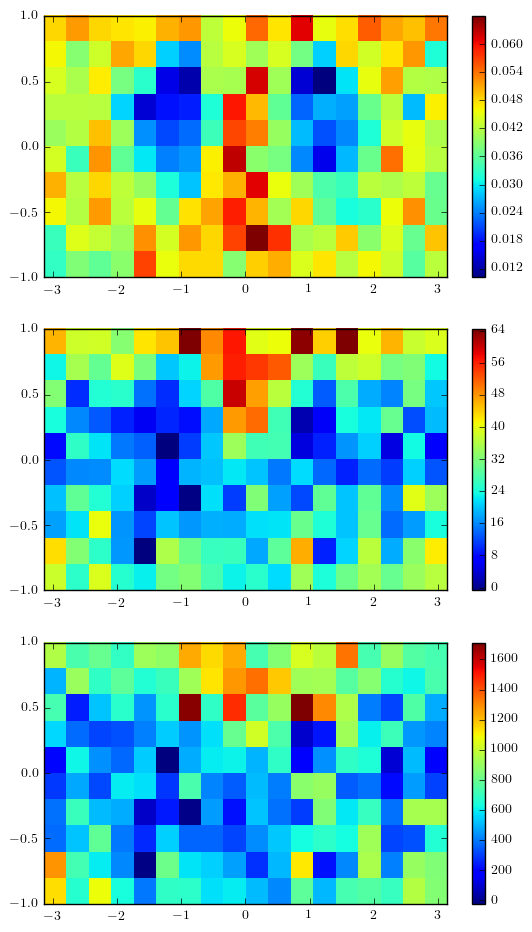

In [40]:
h2e = h2_exp_set[0].Clone('%s_diffs'%h2_exp_set[0].GetName())
h2e.Divide(h2_sim_set[0][4])
hs = [h2_sim_set[0][4],h2_exp_set[0],h2e]
fig = mdraw(hs,1,3)
for h,ax in zip(hs,fig.axes):
    im = rplt.imshow(asrootpy(h), axes=ax)
    plt.colorbar(im, ax=ax) #clim=(h.GetMinimum(),h.GetMaximum()), ax=ax)

In [41]:
import math

E1F_E0 = 5.497
E16_E0 = 5.754
LUM = 28.1e6 #19.844e6

PI = 3.14159265358979312
FSC = 0.00729735253
A = FSC
NA = 6.02214129E23
QE = 1.60217646E-19
MP = 0.93827203
MOMEGA = 0.78265
WOMEGA = 0.00849
BR = 0.891

def nu(w, q2):
    return (w*w-MP*MP+q2)/(2*MP)


def epsilon(w, q2, e0=E1F_E0):
    n = nu(w, q2)
    e1 = e0-n
    epsInv = 1+2*(q2+n*n)/(4*e0*e1-q2)
    return 1.0/epsInv


def vgflux(w, q2, e0=E1F_E0):
    eps = epsilon(w, q2, e0)
    return A*w*(w*w-MP*MP)/(4*PI*e0*e0*MP*MP*q2*(1-eps))


def xb(w, q2):
    return q2/(2*MP*nu(w, q2))

def interp_nn(h, ibin0):
    iL,iR = 0,0
    vL,vR = 0,0
    eL,eR = 0,0
    for ibin in range(ibin0+1,h.GetNbinsX()+1):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iR = ibin
            vR = v
            eR = e
            break
    for ibin in reversed(range(1,ibin0)):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iL = ibin
            vL = v
            eL = e
            break
    vL = vR if iL==0 else vL
    vR = vL if iR==0 else vR
    e = (eL**2+eR**2)**0.5
    if vL == vR:
        return vL
    else:
        #y = y1+m(x-x1)
        m = (vR-vL)/(iR-iL)
        return (vL+m*(ibin0-iL), e)

In [42]:
def w8d_Q2_mean(Q2_0, Q2_1):
    n = math.log(Q2_1)-math.log(Q2_0)
    d = 1/Q2_0-1/Q2_1
    return n/d

In [43]:
avgQ2 = w8d_Q2_mean(Q2[0],Q2[1])
avgW = sum(W)/2 if isinstance(W,list) else W
print('Q2=%.3f'%avgQ2)
print('vgflux=%.9f'%vgflux(avgW, avgQ2, E16_E0))

Q2=1.979
vgflux=0.000268192


(143.15283539436828, 10.633997589595484)
(-36.87659392349412, 15.784542903340142)
(17.468137101650953, 14.375849366554103)
-
(116.92257024575022, 10.083499437261297)
(-38.31523827634344, 14.666530536340765)
(28.201351829389328, 13.752765900847178)
-
(98.69120943847142, 8.920493274695026)
(-4.560656277113545, 12.081332789150625)
(-8.873038361227792, 12.890110961278786)
-
(90.91262791523147, 8.32804703424584)
(-31.90772221285128, 12.162970310921889)
(22.25721925952725, 11.444125146929332)
-
(88.71662908519447, 9.168342300549256)
(13.342110567033364, 12.171021069602112)
(-9.019632141561484, 13.262938803671586)
-
(82.20184074736906, 8.899291750336863)
(20.901603820658195, 11.708898030776515)
(6.701738052961657, 12.452689367533182)
-
(106.02076031048485, 10.696394539041568)
(20.641508063489727, 14.277101086962233)
(27.75686654867609, 15.511447107311053)
-
(137.94017648631097, 11.247638237176641)
(47.91960907552562, 15.380096168066133)
(13.841485159170869, 16.100504784017875)
-
(181.87397735

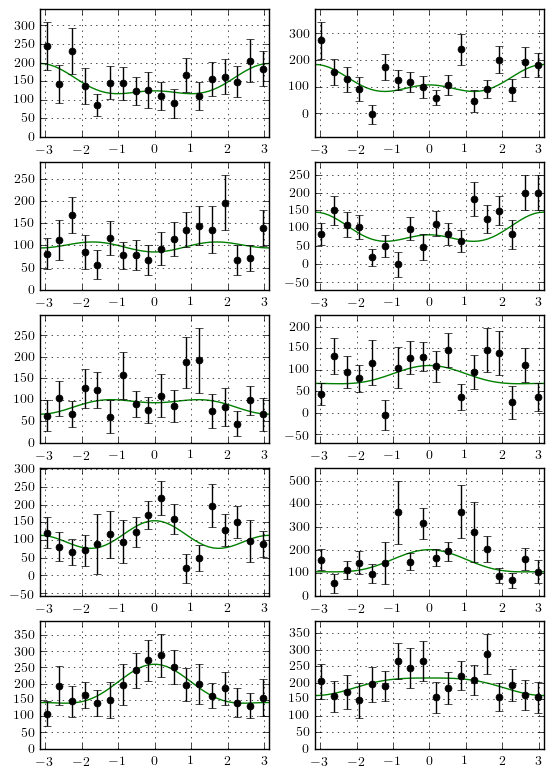

In [44]:
dW, dQ2 = 0.02, Q2[1]-Q2[0]
dPHI, dCOST = 2*PI/18, 0.2
flux = vgflux(avgW, avgQ2, E16_E0)
dW = 0.02 if not isinstance(W, list) else W[1]-W[0]
dQ2 = 0.05 if not isinstance(Q2, list) else Q2[1]-Q2[0]
normval = BR*LUM*flux*dW*dQ2*dCOST*dPHI

def dcoss(x, p):
    return p[0]+p[1]*math.cos(x[0])+p[2]*math.cos(2*x[0])

fcoss = R.TF1('fcoss', dcoss, -PI, PI, 3)
fpol0 = R.TF1('fpol0', lambda x,p: p[0], -PI, PI, 1)
hphis, holes, pcoss = [], [], []
for ibin in range(1,h2e.GetNbinsY()+1):
    hphi = asrootpy(h2e.ProjectionX('%s_%d'%(h2e.GetName(),ibin),ibin,ibin))
    hphi.Scale(1/normval)
    these_holes = hphi.Clone('%s_holes'%h2e.GetName())
    these_holes.Reset()
    for ix in range(1,hphi.GetNbinsX()+1):
        if hphi.GetBinError(ix) == 0:
            nnval, nnerr = interp_nn(hphi, ix)
            these_holes.SetBinContent(ix, nnval)
            these_holes.SetBinError(ix, nnerr)
            hphi.SetBinContent(ix, nnval)
            hphi.SetBinError(ix, nnerr)
    hphi.Fit(fcoss, 'N0')
    fcoss_parms = [(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)]
    print('\n'.join([str(parm) for parm in fcoss_parms]))
    print('-')
    pcoss.append(fcoss_parms)
    holes.append(these_holes)
    hphis.append(hphi)
    
fig = mdraw(hphis, 2,5)
int_2d_0 = 0
for i,ax in enumerate(fig.axes):
    Xlin = np.linspace(-PI, PI)
    for iparm, (parm,err) in enumerate(pcoss[i]):
        fcoss.SetParameter(iparm, parm)
    Ycoss = [fcoss.Eval(x) for x in Xlin]
    int_2d_0 += sum([fcoss.Eval(x) for x in hphi.x()])*0.2*2*PI/18
    ax.plot(Xlin, Ycoss, 'g')
    XY = [(x, y) for (x, y) in zip(list(holes[i].x()), list(holes[i].y())) if y!=0]
    Yerr = [yerr[0] for (x, yerr) in zip(list(holes[i].x()), list(holes[i].yerr())) if yerr[0]!=0]
    if len(XY)>0:
        X, Y = zip(*XY)
        ax.errorbar(X, Y, Yerr, fmt='ro', zorder=20)
    ax.grid()
#         ax.vlines(X, -1000, 3000, 'r', linestyles='dashed')
plt.show()

In [45]:
print(avgW, avgQ2, int_2d_0)
int_2d = 0
for hphi in hphis:
    int_2d += hphi.Integral('width')*0.2
print(avgW, avgQ2, int_2d)

1.8 1.9791011227121358 1558.0307080183854
1.8 1.9791011227121358 1705.3516534331934


(2,
 [2.0, 2.5],
 Hist('hbd_yield_proj_5'),
 (-815.0976765961562,
  1485.8618726388045,
  1.0000002738362352,
  1.0717279699999995,
  0.01999999999999935),
 <ROOT.TF1 object ("fsigbg") at 0xf5d5340>,
 (-815.0976765961562,
  1478.133951816585,
  0.8500002328488644,
  1.0617279699999975,
  0.020000144299417703,
  499.72081926522924,
  0.7875459949906894,
  0.021605978776894935),
 4.875051719036835,
 'CONVERGED ')

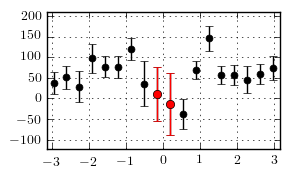

In [32]:
ibin = 7
fig = draw(hphis[ibin])
XY = [(x, y) for (x, y) in zip(list(holes[ibin].x()), list(holes[ibin].y())) if y!=0]
Yerr = [yerr[0] for (x, yerr) in zip(list(holes[ibin].x()), list(holes[ibin].yerr())) if yerr[0]!=0]
if len(XY)>0:
    X, Y = zip(*XY)
    plt.errorbar(X, Y, Yerr, fmt='ro', zorder=20)
    plt.grid()

result

In [29]:
mmp0, mmp1 = ed.MMP_RANGES[0]
mmp_b0, mmp_b1 = hmmp.FindBin(mmp0), hmmp.FindBin(mmp1)
print(mmp_b0, mmp_b1)
print(hmmp.Integral(mmp_b0, mmp_b1))
mmp0, mmp1 = ed.MMP_RANGES[2]
mmp_b0, mmp_b1 = hmmp.FindBin(mmp0), hmmp.FindBin(mmp1)
print(mmp_b0, mmp_b1)
print(hmmp.Integral(mmp_b0, mmp_b1))
mmp0, mmp1 = ed.MMP_RANGES[1]
mmp_b0, mmp_b1 = hmmp.FindBin(mmp0), hmmp.FindBin(mmp1)
print(mmp_b0, mmp_b1)
X = [hmmp.GetBinCenter(mmp_bin) for mmp_bin in range(mmp_b0, mmp_b1+1)]
print(sum([ed.bgfun([x], result[3]) for x in X]))


9 15
2149.561631679535
24 31
3946.9267530441284
16 23
3318.920623687247


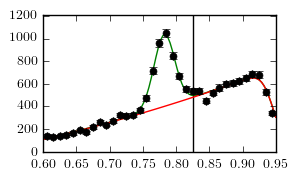

In [30]:
# W, Q2, hmmp, bgparms, f, parms, q, stat
result = h2_exp_set[1]
draw(result[2])
fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
X, Y = zip(*fitted_points)
Y_bg = [ed.bgfun([x], result[3]) for x in X]
plt.plot(X, Y)
plt.plot(X, Y_bg)
plt.vlines(0.825,0,3500)
plt.show()

In [31]:
print(W,Q2)

1.9 [1.9500000000000002, 2.55]
